# Sidekick - Histograms
We plot the histograms for the distribution of increase in money and time between jumps.

In [1]:
%matplotlib inline
import os
import sys
sys.path.insert(0, os.path.abspath('../utils/')) # Add sibling to Python path
sys.path.insert(0, os.path.abspath('../src/')) # Add sibling to Python path
sys.stdout.flush() # Print output on the fly in Notebook
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18,8)
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['legend.fontsize'] = 16
from IPython.display import display
import numpy as np
import GPy
import cPickle as cp
import matplotlib.pyplot as plt
from math import floor
from dataset import Sidekick
from misc_utils import progress

DATA_DIR = "../data/sidekick"

warning in stationary: failed to import cython module: falling back to numpy


## Load data

In [ ]:
sk = Sidekick()
sk.load()

## Generate series of jumps and times

In [45]:
jumps = []
times = []
for i, project in sk.projects.iteritems():
    X, Y = project.difference_series(project.money)
    jumps.extend(Y)
    times.extend(np.diff(X))

## Histogram of jumps

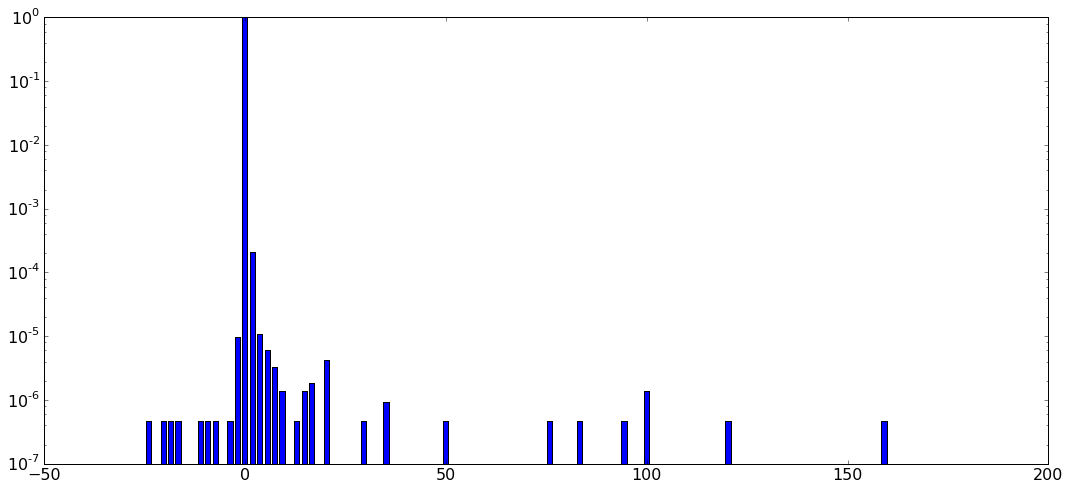

In [88]:
hist, bins = np.histogram(jumps, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist / float(np.sum(hist)), align='center', width=width)
plt.yscale('log')
plt.show()

## Histogram of times

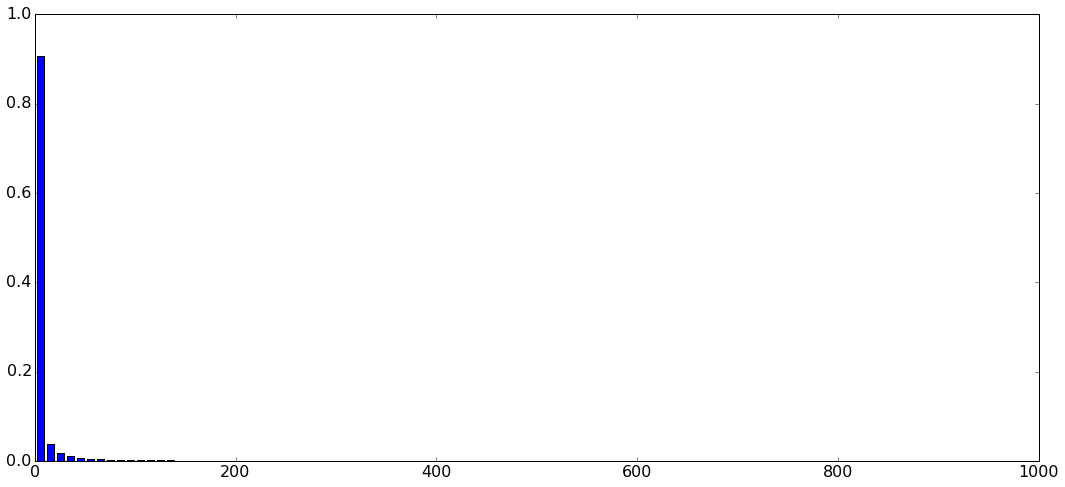

In [77]:
hist, bins = np.histogram(times, bins=100)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist / float(np.sum(hist)), align='center', width=width)
plt.yscale('log')
plt.show()

## Exponential distribution with `lambda = mean(times)`

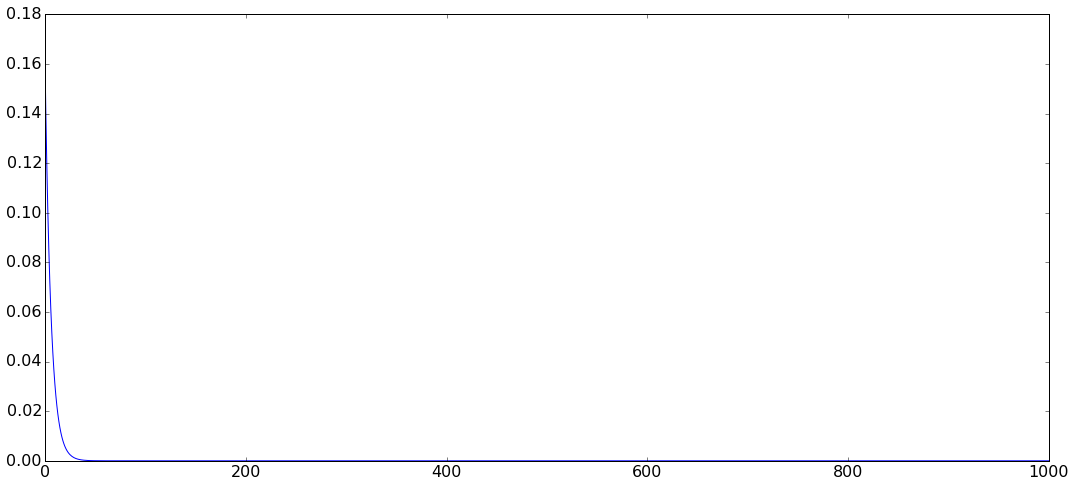

In [87]:
from scipy.stats import expon
t = times / max(times)
l = np.mean(times) 
x = np.linspace(0, 1000, 1000)
e = expon.pdf(x, scale = l)
plt.plot(x, e)
#plt.yscale('log')